In [2]:
import json
with open("./part1/ImageSets/groundtruth.json", "r") as f:
    file = json.loads(f.read())
print(file.keys())

dict_keys(['metadata', 'samples'])


In [13]:
projects = list(file["samples"].keys())
projects[:3]

['673f29c3e4b4428fa26bc55d812d45d9',
 '63c5597a57b04b448723f1f1844a2b78',
 '00bb96a5a68f4fa5bc5c5dc66ce314d2']

In [14]:
"34ddac3f4d1249d3842920dc16e40757" in projects

True

In [55]:
from urllib.parse import urlparse
import boto3
from botocore.client import Config
from botocore import UNSIGNED
import os
s3_client = boto3.client('s3', config=Config(signature_version=UNSIGNED))

for frame in file["samples"]["261569412d59464aaadc77528a46282c"]["entities"]:
    if frame.get("bb"):
        s3_path = f"part1/Images/{frame['flight_id']}/{frame['img_name']}"
        local_path = f"/home/shekhar/identv/dronedataset/part1/Images/{frame['flight_id']}/{frame['img_name']}"
        try:
            s3_client.download_file(bucket, s3_path, local_path)
            success +=1
        except:
            fail +=1
            pass
        break
print(success, fail)

36 0


In [56]:
frame

{'time': 1566546007888387230,
 'blob': {'frame': 3, 'range_distance_m': 327.7521615250486},
 'id': 'Helicopter1',
 'bb': [1488.4, 916.537414551, 34.19999999999982, 19.862585448999994],
 'labels': {'is_above_horizon': 1},
 'flight_id': '261569412d59464aaadc77528a46282c',
 'img_name': '1566546007888387230261569412d59464aaadc77528a46282c.png'}

In [60]:
len([frame["bb"] for project in projects for frame in file["samples"][project]["entities"] if frame.get("bb") ])

1042499

(2048, 2448, 3)


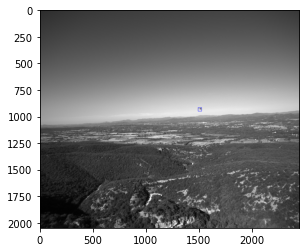

In [73]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(local_path)
bbox = frame["bb"]
x= int(bbox[0])
y = int(bbox[1])
w = int(bbox[2])
h = int(bbox[2])
print(img.shape)
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
plt.imshow(img)